In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


In [2]:
data = pd.read_csv('RTA Dataset.csv')

In [3]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


# Handle Missing Values

In [4]:
missing_values = data.isnull().sum()
print(missing_values)

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [5]:
data.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'], axis = 1, inplace = True)

In [7]:
columns_to_drop = ['Vehicle_driver_relation', 'Driving_experience','Type_of_vehicle', 'Owner_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Type_of_collision','Vehicle_movement','Educational_level']

for column_name in columns_to_drop:
    if column_name in data.columns:
        data = data.dropna(subset=[column_name])
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")


# exploratory data analysis

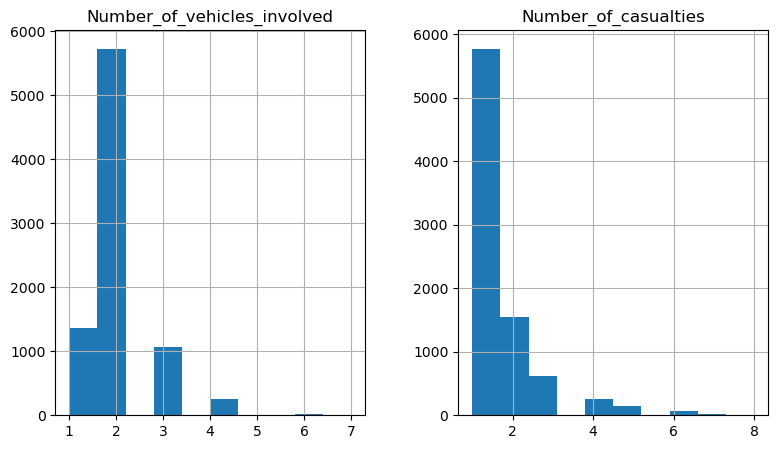

In [8]:
data.hist(layout=(1,6), figsize=(30,5))
plt.show()

In [9]:
data['Number_of_casualties'].value_counts()

Number_of_casualties
1    5776
2    1552
3     615
4     261
5     149
6      65
7      14
8       7
Name: count, dtype: int64

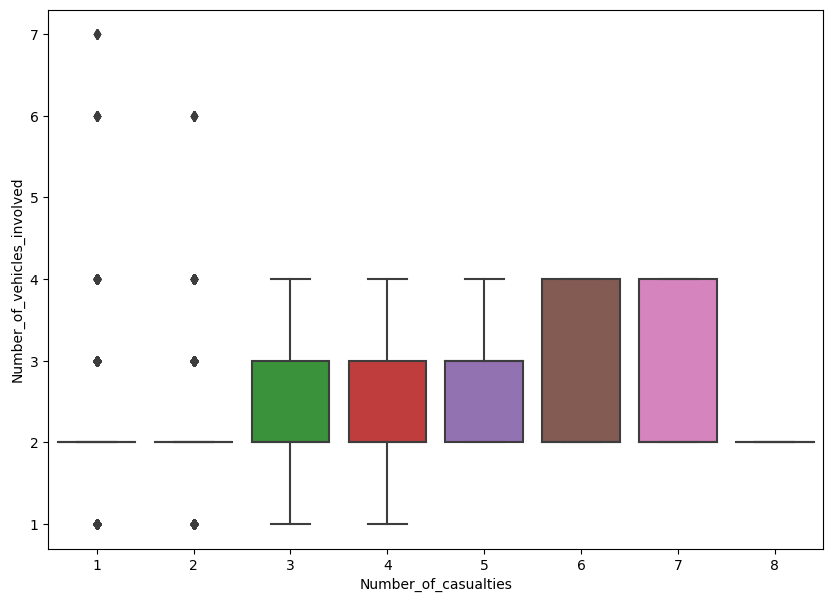

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data, y='Number_of_vehicles_involved', x='Number_of_casualties')
plt.show()

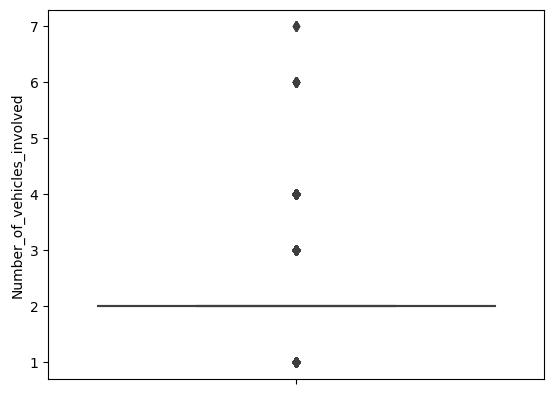

In [11]:
sns.boxplot(data=data, y='Number_of_vehicles_involved')
plt.show()

In [12]:
data['Number_of_vehicles_involved']

1        2
3        2
7        2
8        2
9        2
        ..
12309    2
12312    2
12313    1
12314    2
12315    2
Name: Number_of_vehicles_involved, Length: 8439, dtype: int64

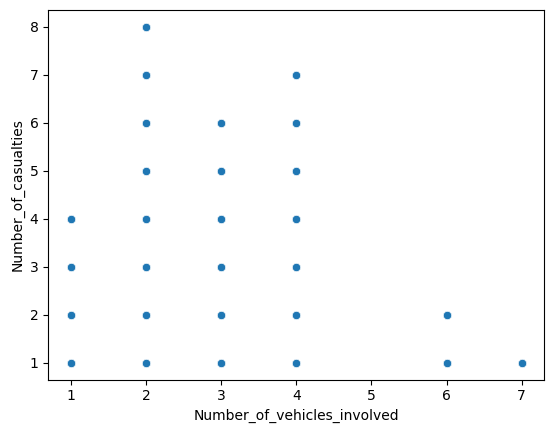

In [13]:
sns.scatterplot(x=data['Number_of_vehicles_involved'], y=data['Number_of_casualties'])
plt.show()

D:\Users\Sampritha S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


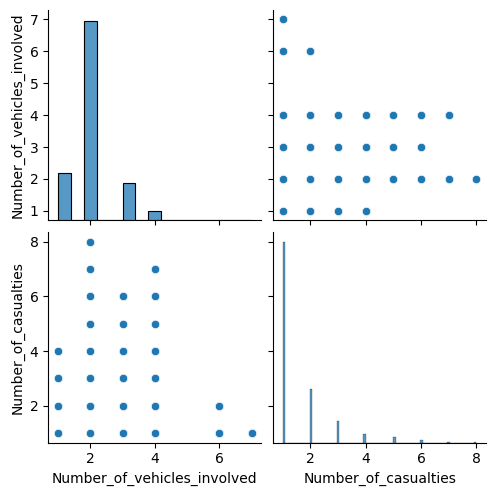

In [14]:
sns.pairplot(data[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

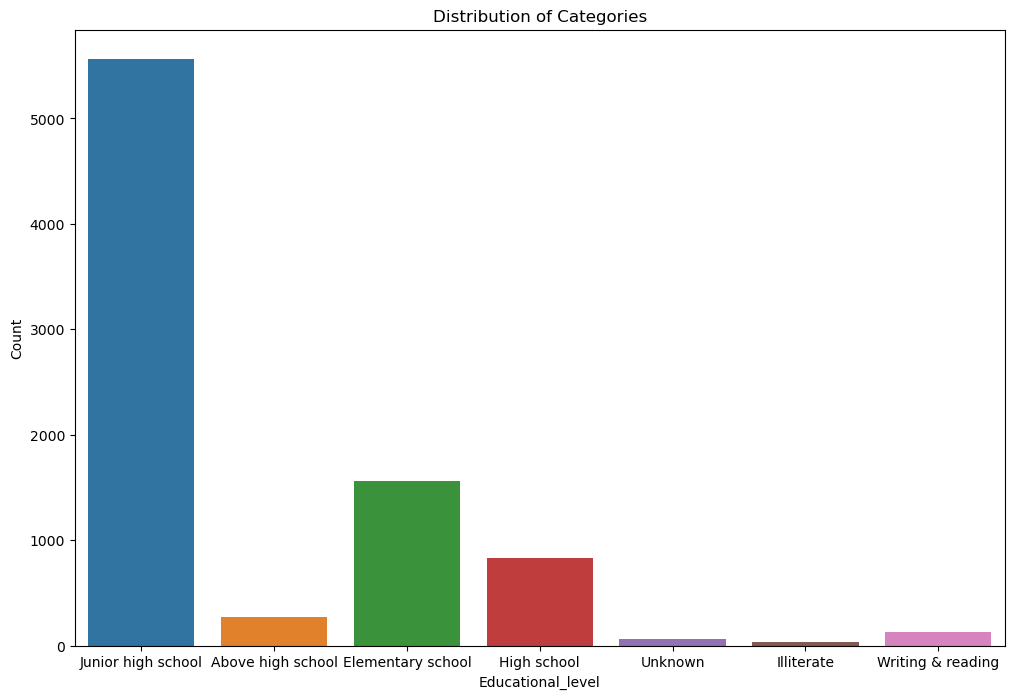

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Educational_level')
plt.title('Distribution of Categories')
plt.xlabel('Educational_level')
plt.ylabel('Count')
plt.show()

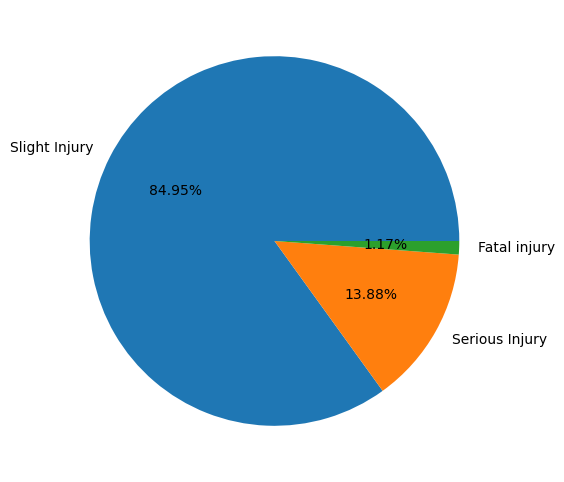

In [17]:
plt.figure(figsize=(8,6))
plt.pie(x=data['Accident_severity'].value_counts().values,
labels=data['Accident_severity'].value_counts().index,
autopct='%2.2f%%')
plt.show()

D:\Users\Sampritha S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Users\Sampritha S\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


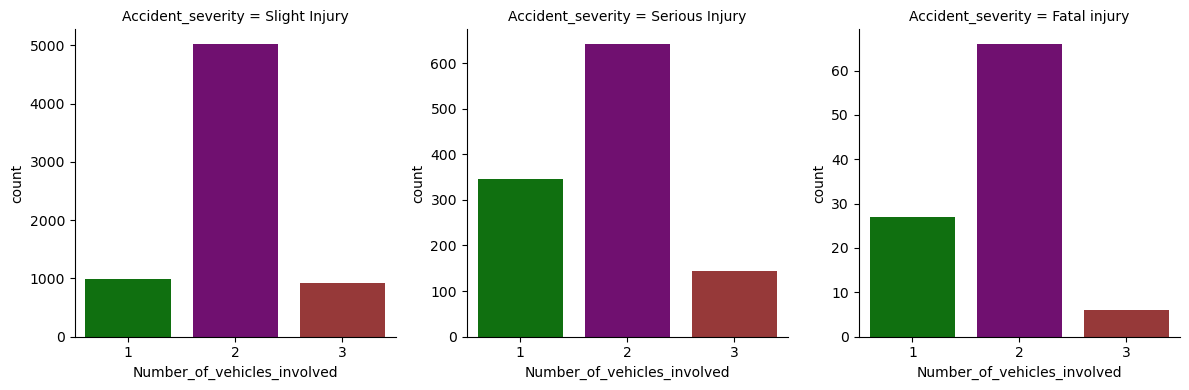

In [18]:
grid = sns.FacetGrid(data=data, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['green', 'purple', 'brown'])
plt.show()

# Handle Outliers

In [22]:
import pandas as pd
import numpy as np
from scipy import stats


numeric_data = data.select_dtypes(include=np.number)


z_scores = np.abs(stats.zscore(numeric_data))
threshold = 3
outlier_rows, outlier_columns = np.where(z_scores > threshold)

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)
filtered_data = data[~outliers]
filtered_data.head()


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
7,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Residential areas,other,...,2,1,U-Turn,na,na,na,na,Not a Pedestrian,No priority to vehicle,Slight Injury
8,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Industrial areas,other,...,2,1,Going straight,Pedestrian,Male,Under 18,3,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Residential areas,Undivided Two way,...,2,1,U-Turn,Passenger,Male,18-30,3,Not a Pedestrian,Moving Backward,Serious Injury


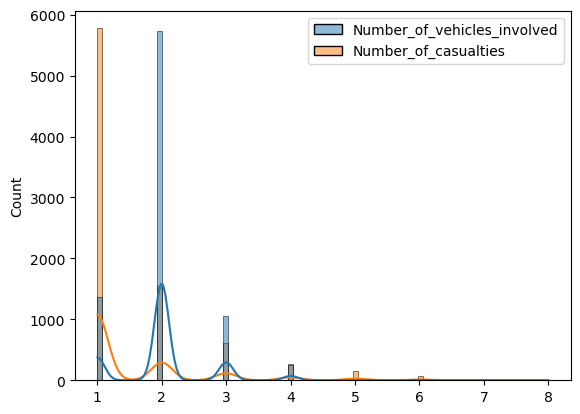

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data, kde=True)
plt.show()

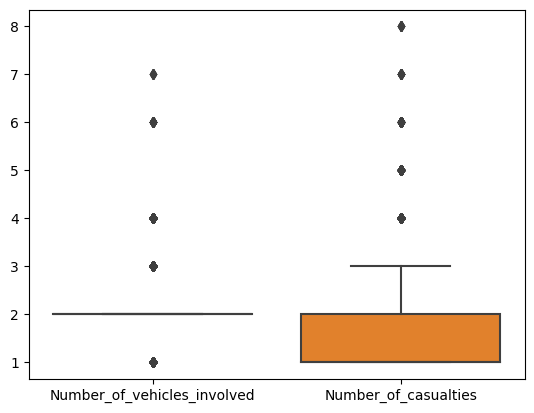

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)
plt.show()

In [25]:
data = data[~outliers]
data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
7,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Residential areas,other,...,2,1,U-Turn,na,na,na,na,Not a Pedestrian,No priority to vehicle,Slight Injury
8,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Industrial areas,other,...,2,1,Going straight,Pedestrian,Male,Under 18,3,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Residential areas,Undivided Two way,...,2,1,U-Turn,Passenger,Male,18-30,3,Not a Pedestrian,Moving Backward,Serious Injury


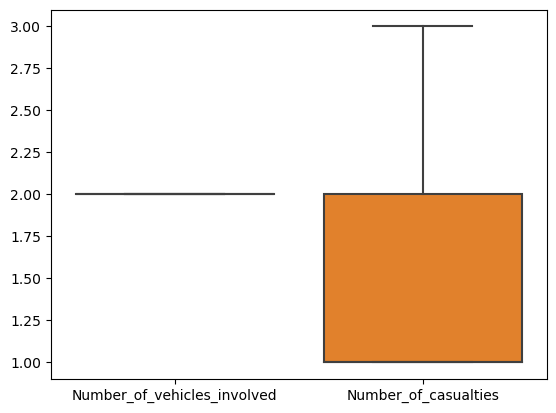

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)
plt.show()

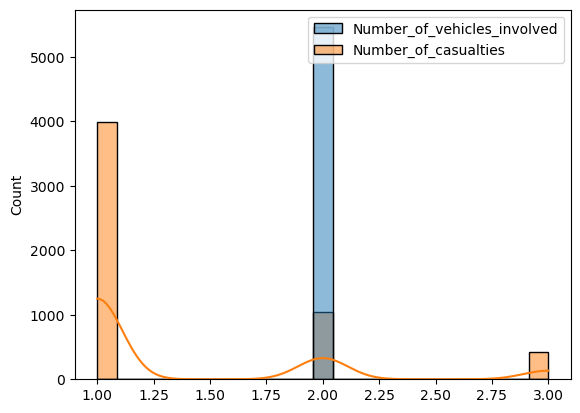

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.boxplot(data=data)
#plt.show()
sns.histplot(data, kde=True)
plt.show()

# feature reduction

In [28]:
data.dtypes

Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Pedestrian_movement            object
Cause_of_accident              object
Accident_sev

In [29]:
categorical=[i for i in data.columns if data[i].dtype=='O']

In [31]:
from sklearn.preprocessing import LabelEncoder
df1=pd.DataFrame()
le = LabelEncoder()

for i in categorical:
    if i != 'Accident_severity':
        df1[i] = le.fit_transform(data[i])

In [32]:
data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
7,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Residential areas,other,...,2,1,U-Turn,na,na,na,na,Not a Pedestrian,No priority to vehicle,Slight Injury
8,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Industrial areas,other,...,2,1,Going straight,Pedestrian,Male,Under 18,3,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Residential areas,Undivided Two way,...,2,1,U-Turn,Passenger,Male,18-30,3,Not a Pedestrian,Moving Backward,Serious Injury


In [33]:
df1.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,1,1,1,4,0,3,11,3,6,4,...,3,2,8,2,3,2,5,3,5,16
1,3,0,1,4,0,2,11,0,6,6,...,0,2,8,2,2,0,0,2,5,1
2,0,0,1,4,0,1,0,0,8,6,...,3,2,8,10,3,2,5,3,5,12
3,0,0,1,4,0,3,5,3,4,6,...,3,2,3,2,2,1,4,2,0,1
4,0,0,1,4,0,0,0,3,8,4,...,3,2,3,10,1,1,0,2,5,9


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5461 entries, 0 to 5460
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Day_of_week              5461 non-null   int32
 1   Age_band_of_driver       5461 non-null   int32
 2   Sex_of_driver            5461 non-null   int32
 3   Educational_level        5461 non-null   int32
 4   Vehicle_driver_relation  5461 non-null   int32
 5   Driving_experience       5461 non-null   int32
 6   Type_of_vehicle          5461 non-null   int32
 7   Owner_of_vehicle         5461 non-null   int32
 8   Area_accident_occured    5461 non-null   int32
 9   Lanes_or_Medians         5461 non-null   int32
 10  Road_allignment          5461 non-null   int32
 11  Types_of_Junction        5461 non-null   int32
 12  Road_surface_type        5461 non-null   int32
 13  Road_surface_conditions  5461 non-null   int32
 14  Light_conditions         5461 non-null   int32
 15  Weat

<Axes: >

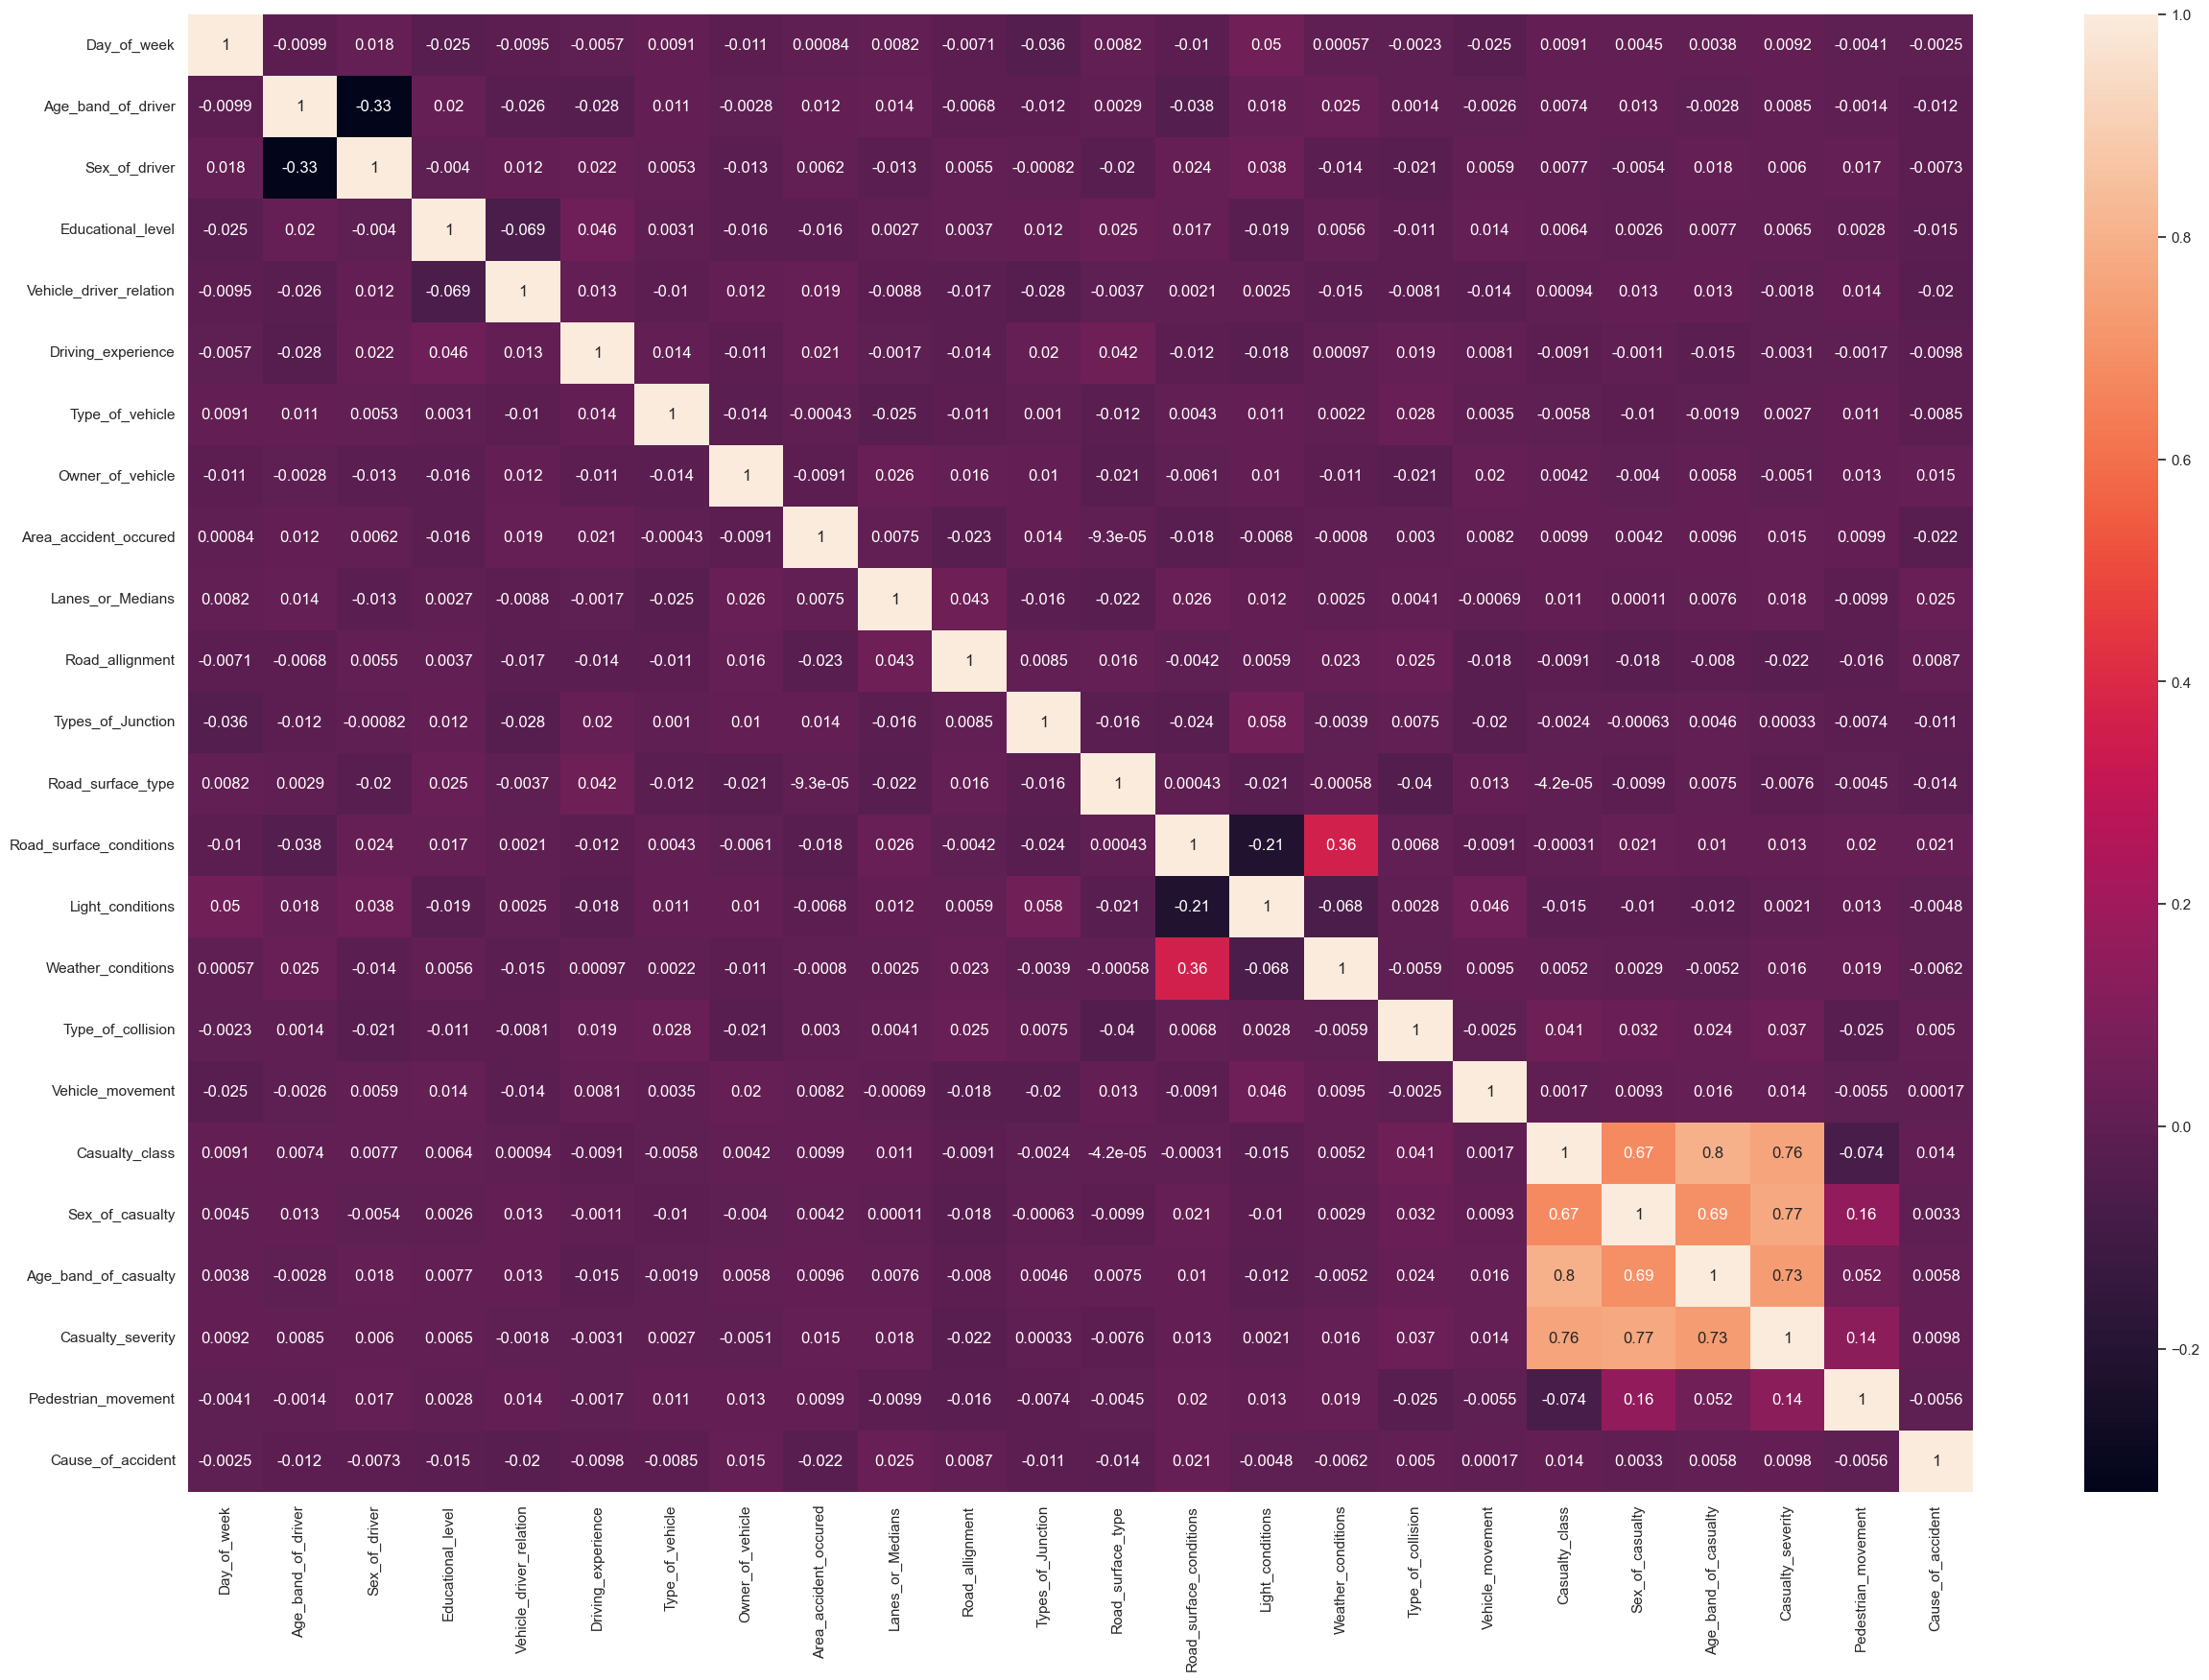

In [35]:
plt.figure(figsize=(30,20))
sns.set(font_scale=1)
sns.heatmap(df1.corr(),annot=True)

In [36]:
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,data['Accident_severity'])

In [37]:
f_p_values

(array([ 2.32303184,  2.18540829,  0.31818382,  0.09015836, 12.91081165,
         1.51926676,  7.86972499,  0.34801333,  1.51001482,  2.02044944,
         0.0164551 , 10.91664101,  4.2868611 ,  4.79429332,  0.88416798,
         1.61312768,  3.2504883 ,  1.14599512,  1.46462336,  0.60500438,
         5.35350834,  0.06059191,  0.30677449,  4.0203461 ]),
 array([0.31301132, 0.33530854, 0.85291796, 0.95592179, 0.001572  ,
        0.46783791, 0.01954839, 0.8402913 , 0.47000713, 0.36413714,
        0.9918062 , 0.00426071, 0.11725191, 0.09097717, 0.64269565,
        0.4463893 , 0.1968636 , 0.56383278, 0.48079626, 0.73896687,
        0.06878606, 0.97015837, 0.85779748, 0.13396549]))

In [38]:
df1.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
0,1,1,1,4,0,3,11,3,6,4,...,3,2,8,2,3,2,5,3,5,16
1,3,0,1,4,0,2,11,0,6,6,...,0,2,8,2,2,0,0,2,5,1
2,0,0,1,4,0,1,0,0,8,6,...,3,2,8,10,3,2,5,3,5,12
3,0,0,1,4,0,3,5,3,4,6,...,3,2,3,2,2,1,4,2,0,1
4,0,0,1,4,0,0,0,3,8,4,...,3,2,3,10,1,1,0,2,5,9


In [39]:
f_p_values1=pd.DataFrame({'features':df1.columns, 'Fscore': f_p_values[0], 'Pvalues':f_p_values[1]})
f_p_values1

,features,Fscore,Pvalues
0,Day_of_week,2.323032,0.313011
1,Age_band_of_driver,2.185408,0.335309
2,Sex_of_driver,0.318184,0.852918
3,Educational_level,0.090158,0.955922
4,Vehicle_driver_relation,12.910812,0.001572
5,Driving_experience,1.519267,0.467838
6,Type_of_vehicle,7.869725,0.019548
7,Owner_of_vehicle,0.348013,0.840291
8,Area_accident_occured,1.510015,0.470007
9,Lanes_or_Medians,2.020449,0.364137


In [40]:
f_p_values1.sort_values(by='Pvalues',ascending=True)

,features,Fscore,Pvalues
4,Vehicle_driver_relation,12.910812,0.001572
11,Types_of_Junction,10.916641,0.004261
6,Type_of_vehicle,7.869725,0.019548
20,Age_band_of_casualty,5.353508,0.068786
13,Road_surface_conditions,4.794293,0.090977
12,Road_surface_type,4.286861,0.117252
23,Cause_of_accident,4.020346,0.133965
16,Type_of_collision,3.250488,0.196864
0,Day_of_week,2.323032,0.313011
1,Age_band_of_driver,2.185408,0.335309


In [41]:
df1.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident'],
      dtype='object')

In [42]:
#after evaluating we are removing lesser important columns and storing to a new data frame
df2=data.drop(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident'],axis=1)
df2.head()

,Vehicle_driver_relation,Type_of_vehicle,Types_of_Junction,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
1,Employee,Public (> 45 seats),No junction,2,2,Slight Injury
3,Employee,Public (> 45 seats),Y Shape,2,2,Slight Injury
7,Employee,Automobile,Y Shape,2,1,Slight Injury
8,Employee,Lorry (41?100Q),Y Shape,2,1,Slight Injury
9,Employee,Automobile,Y Shape,2,1,Serious Injury


In [45]:
df2.shape

(5461, 6)

In [46]:
df2.head()

,Vehicle_driver_relation,Type_of_vehicle,Types_of_Junction,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
1,Employee,Public (> 45 seats),No junction,2,2,Slight Injury
3,Employee,Public (> 45 seats),Y Shape,2,2,Slight Injury
7,Employee,Automobile,Y Shape,2,1,Slight Injury
8,Employee,Lorry (41?100Q),Y Shape,2,1,Slight Injury
9,Employee,Automobile,Y Shape,2,1,Serious Injury


In [47]:
df2.columns

Index(['Vehicle_driver_relation', 'Type_of_vehicle', 'Types_of_Junction',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Accident_severity'],
      dtype='object')

In [48]:
data.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [49]:
categorical = ['Vehicle_driver_relation', 'Type_of_vehicle', 'Types_of_Junction',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Accident_severity']

# Create a new DataFrame for label encoding
df3=pd.DataFrame()

# initialize the Label Encoder
le = LabelEncoder()

for i in categorical:
    if i != 'Accident_severity':
        df3[i] = le.fit_transform(df2[i])


In [50]:
df2.head()

,Vehicle_driver_relation,Type_of_vehicle,Types_of_Junction,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
1,Employee,Public (> 45 seats),No junction,2,2,Slight Injury
3,Employee,Public (> 45 seats),Y Shape,2,2,Slight Injury
7,Employee,Automobile,Y Shape,2,1,Slight Injury
8,Employee,Lorry (41?100Q),Y Shape,2,1,Slight Injury
9,Employee,Automobile,Y Shape,2,1,Serious Injury


In [51]:
df2.head()

,Vehicle_driver_relation,Type_of_vehicle,Types_of_Junction,Number_of_vehicles_involved,Number_of_casualties,Accident_severity
1,Employee,Public (> 45 seats),No junction,2,2,Slight Injury
3,Employee,Public (> 45 seats),Y Shape,2,2,Slight Injury
7,Employee,Automobile,Y Shape,2,1,Slight Injury
8,Employee,Lorry (41?100Q),Y Shape,2,1,Slight Injury
9,Employee,Automobile,Y Shape,2,1,Serious Injury


In [52]:
df3.head()

,Vehicle_driver_relation,Type_of_vehicle,Types_of_Junction,Number_of_vehicles_involved,Number_of_casualties
0,0,11,1,0,1
1,0,11,7,0,1
2,0,0,7,0,0
3,0,5,7,0,0
4,0,0,7,0,0


In [53]:
X = df3[['Vehicle_driver_relation', 'Type_of_vehicle', 'Types_of_Junction',
       'Number_of_vehicles_involved', 'Number_of_casualties']]
y = df2["Accident_severity"]

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# KNN Model Alg

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
y_KNN=model_KNN.predict(x_test)
for prediction in y_KNN:
    print(prediction)

Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Serious Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Sligh

[[  0   0   9]
 [  0   3 116]
 [  0  13 952]] 

0.8737419945105215 

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00         9
Serious Injury       0.19      0.03      0.04       119
 Slight Injury       0.88      0.99      0.93       965

      accuracy                           0.87      1093
     macro avg       0.36      0.34      0.33      1093
  weighted avg       0.80      0.87      0.83      1093



D:\Users\Sampritha S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Sampritha S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Sampritha S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


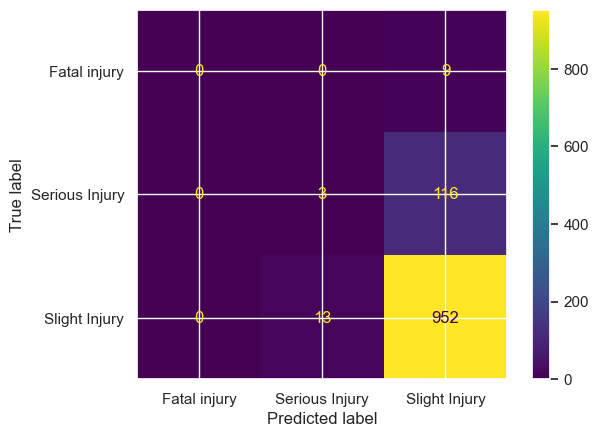

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
matrix_KNN=confusion_matrix(y_test,y_KNN)
print(matrix_KNN,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_KNN))
accuracy_KNN=accuracy_score(y_test,y_KNN)
print(accuracy_KNN,'\n')
report_KNN=classification_report(y_test,y_KNN)
print(report_KNN)

# Naive Bayes Alg

In [58]:
from sklearn.naive_bayes import MultinomialNB
model_naive=MultinomialNB()
model_naive.fit(x_train,y_train)

MultinomialNB()

In [59]:
y_naive=model_naive.predict(x_test)
for prediction in y_naive:
    print(prediction)

Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight

[[  0   0   9]
 [  0   0 119]
 [  0   0 965]] 

0.8828911253430924 

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00         9
Serious Injury       0.00      0.00      0.00       119
 Slight Injury       0.88      1.00      0.94       965

      accuracy                           0.88      1093
     macro avg       0.29      0.33      0.31      1093
  weighted avg       0.78      0.88      0.83      1093



D:\Users\Sampritha S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Sampritha S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\Sampritha S\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


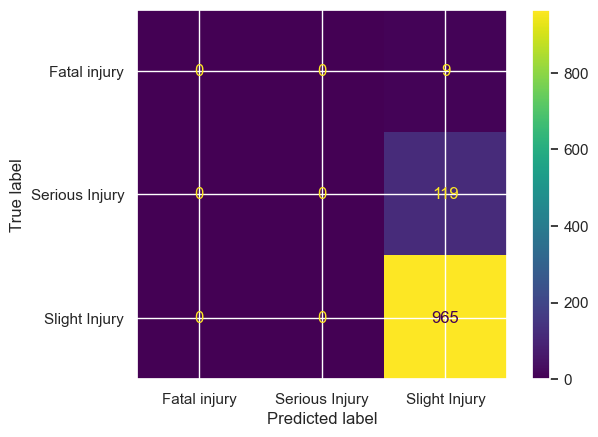

In [63]:
matrix_naive=confusion_matrix(y_test,y_naive)
print(matrix_naive,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_naive))
accuracy_naive=accuracy_score(y_test,y_naive)
print(accuracy_naive,'\n')
report_naive=classification_report(y_test,y_naive)
print(report_naive)

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
model_dec=DecisionTreeClassifier(criterion='entropy')
model_dec.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
y_dec=model_dec.predict(x_test)
# Print all predicted values
for prediction in y_dec:
    print(prediction)

Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Serious Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Serious Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Slight Injury
Seri

[[  1   0   8]
 [  0   3 116]
 [  1  20 944]] 

0.8673376029277219 

                precision    recall  f1-score   support

  Fatal injury       0.50      0.11      0.18         9
Serious Injury       0.13      0.03      0.04       119
 Slight Injury       0.88      0.98      0.93       965

      accuracy                           0.87      1093
     macro avg       0.50      0.37      0.38      1093
  weighted avg       0.80      0.87      0.83      1093



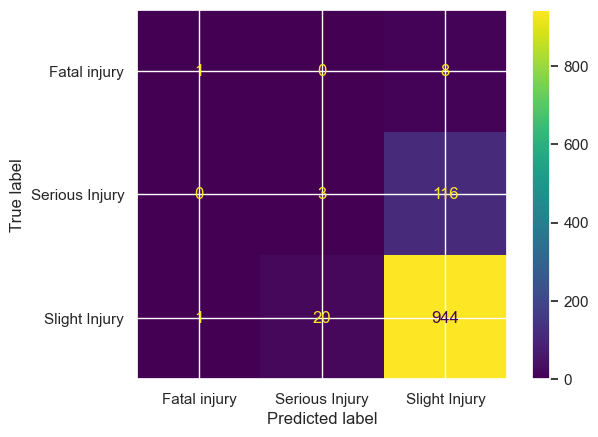

In [66]:
matrix_dec=confusion_matrix(y_test,y_dec)
print(matrix_dec,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_dec))
accuracy_dec=accuracy_score(y_test,y_dec)
print(accuracy_dec,'\n')
report_dec=classification_report(y_test,y_dec)
print(report_dec)

In [67]:
#compare
alg=['KNN','Naive Bayes','Decision Tree']
acc=[accuracy_KNN,accuracy_naive,accuracy_dec]
Accuracy_Scores=pd.DataFrame({'Algorithms':alg, 'Accuracy': acc})
Accuracy_Scores['Accuracy']=Accuracy_Scores['Accuracy']*100
Accuracy_Scores

,Algorithms,Accuracy
0,KNN,87.374199
1,Naive Bayes,88.289113
2,Decision Tree,86.733760


In [68]:
Accuracy_Scores.sort_values(by='Accuracy',ascending=False)

,Algorithms,Accuracy
1,Naive Bayes,88.289113
0,KNN,87.374199
2,Decision Tree,86.733760


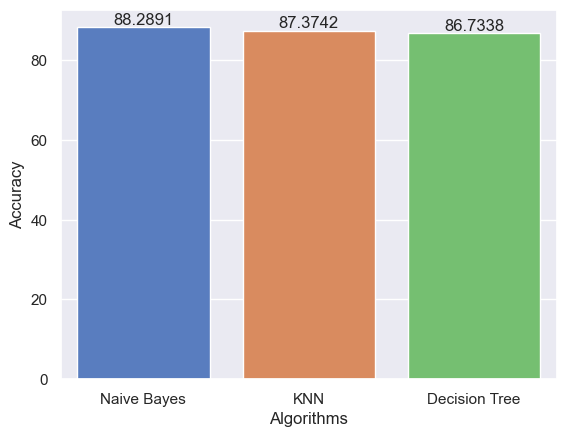

In [69]:
ax = sns.barplot(x='Algorithms', y='Accuracy',
                 palette='muted', data=Accuracy_Scores.sort_values(by='Accuracy',ascending=False),
                 errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)